In [74]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

import warnings
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter('ignore', pd.errors.SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


In [75]:
train = pd.read_csv('~/Documents/AmesHousingML/data_cleaning/data_dummies.csv') 

In [76]:
train

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_

In [77]:
train.shape

(2576, 265)

In [78]:
train.dtypes.value_counts()

float64    240
int64       25
dtype: int64

In [79]:
#train_numerics = train.select_dtypes(include=[np.number])

In [80]:
ft_train = train

Below is to create an object that will hold the categories of the one hot encoded variables into an easy way to add / remove the entire feature... Since features can be broken up into 5+ separate columns I needed an easy way to group and adjust the features as a whole.

In [81]:
# Create an empty dictionary to store dummy variables grouped by original categories
dummy_groups = {}

# Iterate through columns and group dummy variables by the original category
for column in ft_train.columns:
    category = column.split('_')[0] # Extract the original category from the column name
    if category not in dummy_groups:
        dummy_groups[category] = [column]
    else:
        dummy_groups[category].append(column)
    

    
# Convert the dictionary values to a list of lists
grouped_dummies = list(dummy_groups.values())

#dummy_groups

In [82]:
dummy_groups.keys()


dict_keys(['GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond

Now I want to grab a list of all the values in the dictionary and use that as a check list of sorts to start finding the optimal model in linear regression

In [83]:
train.head()

,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSewr,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_PreCast,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBsmt,BsmtQual_Po,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NoBsmt,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBsmt,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_

In [84]:
rScoreStorage = {}

In [85]:
#masterScores = pd.DataFrame(columns = ['Model', 'r2_5kf_mean', 'rmse_5kf_mean'])

In [86]:
def regression_tester(dict_index):
    #input the index of the columns that 
    currentModelIndexes = current_model_indexes.copy()
    index_list_convert = [dict_index]
    currentModelIndexes.extend(index_list_convert)
    colsTrackerTest = currentModelIndexes
    
    included_colsTest = []
    for col in colsTrackerTest:
        included_colsTest.extend(grouped_dummies[col])

    ft_trainTest = train[included_colsTest]

    #the features will be X (independent variables)
    Xtest = ft_trainTest.drop('SalePrice', axis=1)
    X_arrayTest = Xtest.values
    #the target (dependent variable) will be y
    ytest = ft_trainTest['SalePrice']
    y_arrayTest = ytest.values


    # Perform linear regression using scikit-learn
    modeltest = LinearRegression()
    modeltest.fit(Xtest, ytest)



    # Make predictions using the trained model
    predictionsTest = modeltest.predict(Xtest)

    
    # Rsquared value
    #print("R Squared on the test set:", r2_score(ytest, predictionsTest))
    
    rScoreStorage[dict_index] = r2_score(ytest, predictionsTest)
    
    




In [87]:
# #test the indexes of the dataset in LinearRegression 
# # for this current given model and store the results:
# for x in range(1,86):
#     regression_tester(x)


# # #adjust this for the current model
# # for i in rScoreStorage:
# #     print(i, rScoreStorage[i] - r2_score(y, predictions))
    
# #adjust this for the current model and the values you want to include; will output the indexes above the range wanted
# # desired_r2_threshold = .03
# # for i in rScoreStorage:
# #     if (rScoreStorage[i] - current_Model_r2 > desired_r2_threshold):
# #         print(i)


# rMax = 0
# for i in rScoreStorage:
#     if (rScoreStorage[i] > rMax):
#          rMax = rScoreStorage[i]
#          rMaxIndex = i
#          rDiff = rMax - current_Model_r2
# print('\nCurrent Model r2: ', current_Model_r2,
#                 '\nrDiff: ', rDiff,  '\nrMax: ', rMax, '\nrMaxIndex Index: ', rMaxIndex)

# #vifTable[vifTable['VIF'] > 10]


I will try and keep track of what R2 is added with what category of variables included... 

In [88]:
oldr2 = 0
oldmse = 0
oldrmse = 0

In [89]:
# CURRENT MODEL KERNEL

#input the index of the column indexes that are working in the above testing
current_model_indexes = [2, 1, # 77total sf
                         44, 6, 11, 3, 54, 59, 80, 28, 66, 46, 
                         7, 51, 5, 76, 45, 67, 25, 47, 71 , 61]
colsTracker = current_model_indexes
included_cols = []
for col in colsTracker:
    included_cols.extend(grouped_dummies[col])
    
ft_train = train[included_cols]

#the features will be X (independent variables)
X = ft_train.drop('SalePrice', axis=1)
X_array = X.values
#the target (dependent variable) will be y
y = ft_train['SalePrice']
y_array = y.values


# Perform linear regression using scikit-learn
model = LinearRegression()
model.fit(X, y)

X_with_intercept = sm.add_constant(X)  # Add intercept term
model_sm = sm.OLS(y,X_with_intercept).fit()

# Make predictions using the trained model
predictions = model.predict(X)

current_Model_r2 = r2_score(y, predictions)
# Rsquared value
print("R Squared on the test set:", r2_score(y, predictions))
print('R Square Change: ', r2_score(y, predictions) - oldr2)

#if inputting new values it will tell you the change
oldr2 = r2_score(y,predictions)

# Mean Squared Error (MSE) on the test set

print("Mean Squared Error (MSE) on the test set:", mean_squared_error(y, predictions))
print('Mean Squared Error (MSE) Change: ', mean_squared_error(y, predictions) - oldmse)

oldmse = mean_squared_error(y, predictions)

# Root Mean Squared Error (RMSE) on the test set

print("Root Mean Squared Error (RMSE) on the test set:", mean_squared_error(y, predictions, squared=False))
print('Root Mean Squared Error (RMSE) Change: ', mean_squared_error(y, predictions, squared=False) - oldrmse)

oldrmse = mean_squared_error(y, predictions, squared=False)

print(model_sm.summary())

predictors = [col for col in ft_train.columns if col != 'SalePrice']

target = "SalePrice"

#subset the dataframe with these to test
subset_train = train[predictors + [target]]

#add a constant column for intercept
subset_train = add_constant(subset_train)

# Calculate VIF for the predictor variables
vif_table = pd.DataFrame()
vif_table['Variables'] = subset_train.columns
vif_table['VIF'] = [variance_inflation_factor(subset_train.values, i) for i in range(subset_train.shape[1])]
vifTable = vif_table[vif_table['Variables'].isin(predictors)]
# Display the VIF DataFrame for 'ab' and 'ac'
#print(vif_Garage[vif_Garage['Variables'].isin(predictors)])
vifTable[vifTable['VIF'] > 7.5]

R Squared on the test set: 0.8644664943992838
R Square Change:  0.8644664943992838
Mean Squared Error (MSE) on the test set: 762437440.1124676
Mean Squared Error (MSE) Change:  762437440.1124676
Root Mean Squared Error (RMSE) on the test set: 27612.26973851421
Root Mean Squared Error (RMSE) Change:  27612.26973851421
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     193.9
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:00:10   Log-Likelihood:                -29997.
No. Observations:                2576   AIC:                         6.016e+04
Df Residuals:                    2493   BIC:                         6.065e+04
Df Model:                          82            

,Variables,VIF
1,MSSubClass,24.437204
14,ExterCond_Gd,24.950501
16,ExterCond_TA,29.865464
30,Functional_Typ,10.200135
34,BldgType_TwnhsE,10.716875
41,Exterior2nd_HdBoard,12.593683
43,Exterior2nd_MetalSd,12.800202
44,Exterior2nd_Plywood,8.793951
48,Exterior2nd_VinylSd,22.122502
49,Exterior2nd_Wd Sdng,11.849669


# Model Building

Let's start with a simple linear regression on the basic numeric variables we got after making one feature and clearing some multicollinearity.

R Squared on the test set: 0.8644664943992838
Mean Squared Error (MSE) on the test set: 762437440.1124676
Root Mean Squared Error (RMSE) on the test set: 27612.26973851421


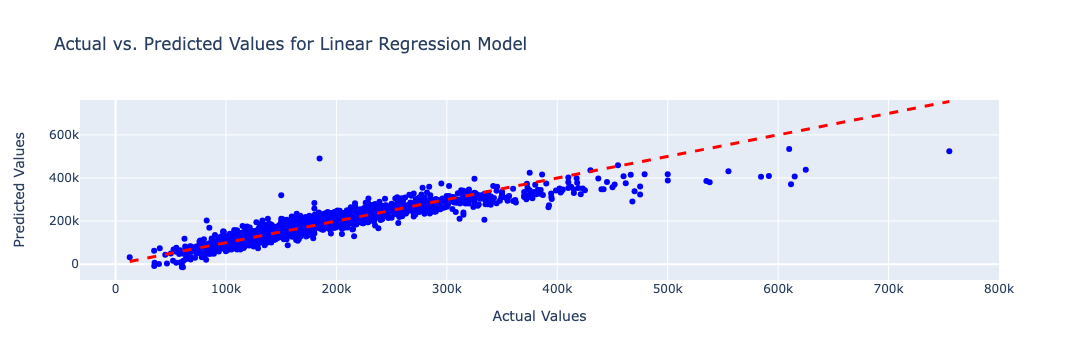

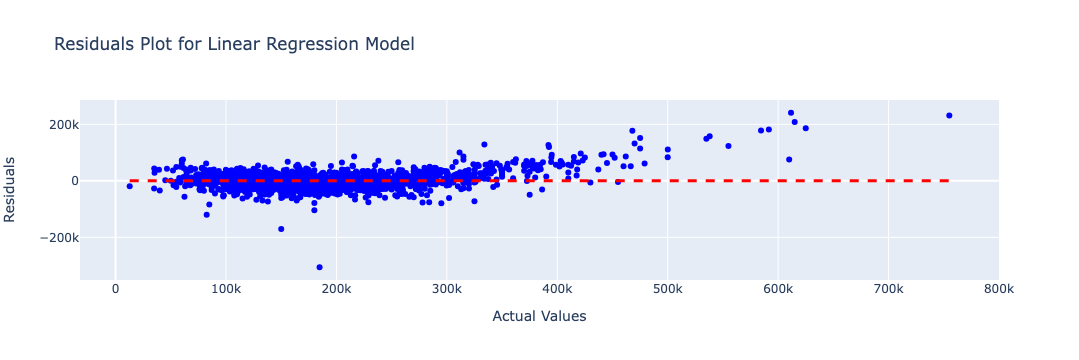

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     193.9
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        11:00:11   Log-Likelihood:                -29997.
No. Observations:                2576   AIC:                         6.016e+04
Df Residuals:                    2493   BIC:                         6.065e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -9

In [90]:
#the features will be X (independent variables)
X = ft_train.drop('SalePrice', axis=1)
X_array = X.values
#the target (dependent variable) will be y
y = ft_train['SalePrice']
y_array = y.values


# Perform linear regression using scikit-learn
model = LinearRegression()
model.fit(X, y)

X_with_intercept = sm.add_constant(X)  # Add intercept term
model_sm = sm.OLS(y,X_with_intercept).fit()

# Make predictions using the trained model
predictions = model.predict(X)


# Rsquared value
print("R Squared on the test set:", r2_score(y, predictions))


# Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y, predictions)
print("Mean Squared Error (MSE) on the test set:", mse)

# Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y, predictions, squared=False)
print("Root Mean Squared Error (RMSE) on the test set:", rmse)



# Create a scatter plot with Plotly
fig = go.Figure()

# Add a scatter plot for actual vs. predicted values
fig.add_trace(go.Scatter(x=y, y=predictions, mode='markers', marker=dict(color='blue'), 
                         name='Actual vs. Predicted'))
# Add a diagonal line for perfect predictions
fig.add_shape(type="line", x0=min(y), x1=max(y), y0=min(y), y1=max(y),
              line=dict(color="red", width=3, dash='dash'),
              name="Perfect Predictions")

# Update layout and axis labels
fig.update_layout(title="Actual vs. Predicted Values for Linear Regression Model",
                  xaxis_title="Actual Values",
                  yaxis_title="Predicted Values")

# Show the plot
fig.show()


# Plotting residuals
residuals = y - predictions
fig2 = go.Figure()

# Add a scatter plot for actual values and residuals
fig2.add_trace(go.Scatter(x=y, y=residuals, mode='markers', marker=dict(color='blue'), 
                         name='Residuals'))

# Add a horizontal line at y=0 for reference
fig2.add_shape(type="line", x0=min(y), x1=max(y), y0=0, y1=0,
              line=dict(color="red", width=3, dash='dash'),
              name="Zero Residuals Line")


fig2.update_layout(title="Residuals Plot for Linear Regression Model",
                  xaxis_title="Actual Values",
                  yaxis_title="Residuals")

fig2.show()


# Using statsmodels to check p-values
print(model_sm.summary())
print('\n')

# Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

print('\n')

print("F-statistic:", model_sm.fvalue)
print("F-statistic p-value:", model_sm.f_pvalue)

# Test Train Split Model

I was originally using the full dataset to train my model and test it on the same data. We will now look at how the results are from splitting the data.

R Squared on the test set: 0.8547698337142347
Mean Squared Error (MSE) on the test set: 715766500.1259848
Root Mean Squared Error (RMSE) on the test set: 26753.812814736983


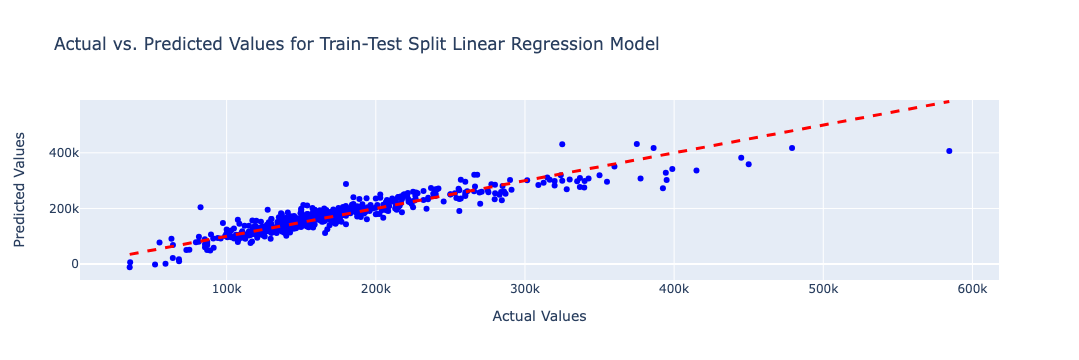

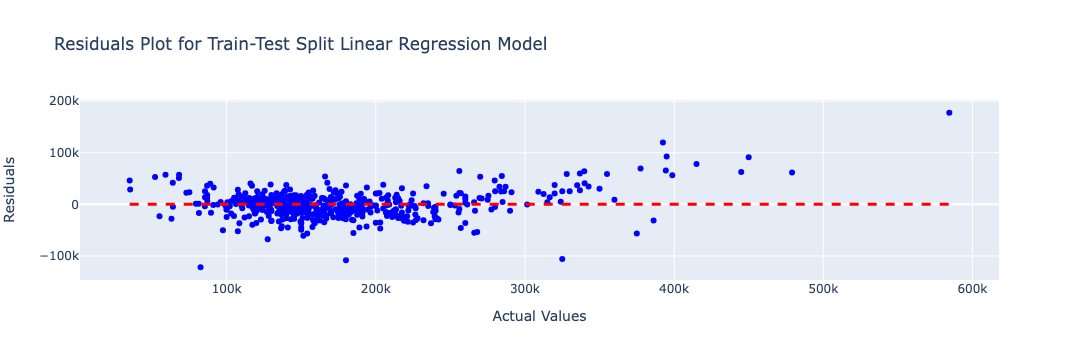

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Rsquared value
print("R Squared on the test set:", r2_score(y_test, predictions))


# Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE) on the test set:", mse)

# Root Mean Squared Error (RMSE) on the test set
rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE) on the test set:", rmse)


# Create a scatter plot with Plotly
fig = go.Figure()

# Add a scatter plot for actual vs. predicted values on the test set
fig.add_trace(go.Scatter(x=y_test, y=predictions, mode='markers', marker=dict(color='blue'), 
                         name='Actual vs. Predicted'))
# Add a diagonal line for perfect predictions
fig.add_shape(type="line", x0=min(y_test), x1=max(y_test), y0=min(y_test), y1=max(y_test),
              line=dict(color="red", width=3, dash='dash'),
              name="Perfect Predictions")

# Update layout and axis labels
fig.update_layout(title="Actual vs. Predicted Values for Train-Test Split Linear Regression Model",
                  xaxis_title="Actual Values",
                  yaxis_title="Predicted Values")

# Show the plot
fig.show()

# Plotting residuals
residuals = y_test - predictions
fig2 = go.Figure()

# Add a scatter plot for actual values and residuals on the test set
fig2.add_trace(go.Scatter(x=y_test, y=residuals, mode='markers', marker=dict(color='blue'), 
                         name='Residuals'))

# Add a horizontal line at y=0 for reference
fig2.add_shape(type="line", x0=min(y_test), x1=max(y_test), y0=0, y1=0,
              line=dict(color="red", width=3, dash='dash'),
              name="Zero Residuals Line")

fig2.update_layout(title="Residuals Plot for Train-Test Split Linear Regression Model",
                  xaxis_title="Actual Values",
                  yaxis_title="Residuals")

fig2.show()

print('\n')


In [94]:
# Create a KFold object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [95]:
masterScores = pd.DataFrame(columns = ['Model', 'data_process', 'r2_5kf_mean', 'rmse_5kf_mean'])
outlierType = ['threeXOutlier', 'onlyNormalCondition', 'allOutliers']

In [96]:
dataset = 'dummified'
for trial in outlierType:
        #this will create the model name by which outlier type, below we will adjust the dataset
        # to match the outlier type being tested, it will then be stored by dataset_outlierType
        model_name = 'MLR'
        data_process = f"{dataset}_{trial}"
        
        #below is filtering out the 3*IQR range if the trial is for that purpose
        if (trial == 'threeXOutlier'):
            frame = ft_train.copy()
            outlier_threshold = 3
            Q1 = frame['SalePrice'].quantile(.25)
            Q3 = frame['SalePrice'].quantile(.75)
            IQR = Q3 - Q1
            new_bounds = Q3 + outlier_threshold * IQR
            frame.drop(frame[frame['SalePrice'] > new_bounds].index, axis=0, inplace = True)
            
        #below is filtering out the houses that sold in normal condition
        elif (trial == 'onlyNormalCondition'):
            holder = train.copy()
            holder = holder[holder['SaleCondition_Normal'] == 1.0]
            frame = holder[included_cols]
                
        elif (trial == 'allOutliers'):
            frame = ft_train.copy()
        
    
        #the features will be X (independent variables)
        X = frame.drop('SalePrice', axis=1)
        X_array = X.values
        #the target (dependent variable) will be y
        y = frame['SalePrice']
        y_array = y.values

        #Split your training and testing sets of data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        # Initialize the linear regression model
        model = LinearRegression()

        # Train the model on the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = model.predict(X_test)
        
       
        
        # Perform cross-validation
        cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
        
        def rmse_scorer(y_true, y_pred):
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            return rmse
    
        # Define the scoring function using neg_mean_squared_error
        scorer = make_scorer(rmse_scorer)
        
        # Use cross_val_score with the defined scorer
        rmse_scores = cross_val_score(model, X, y, cv=kf, scoring=scorer)
        
        # Display the cross-validation scores
        print("Cross-Validation Scores:", cv_scores, '\n')
        print(f"Mean R^2: {cv_scores.mean()}", '\n') 
        
      
        record = {'Model': model_name, 'data_process': data_process, 'r2_5kf_mean': cv_scores.mean(), 'rmse_5kf_mean': rmse_scores.mean()}
        masterScores = masterScores.append(record, ignore_index=True)

        print('\n')
        print('\n')
        print('\n')


Cross-Validation Scores: [0.80758182 0.86665185 0.8912804  0.87174975 0.77351379] 

Mean R^2: 0.8421555208505801 







Cross-Validation Scores: [0.86327156 0.88114226 0.86539932 0.85182131 0.87671835] 

Mean R^2: 0.8676705573209492 







Cross-Validation Scores: [0.85476983 0.80146638 0.86615499 0.84984717 0.71306756] 

Mean R^2: 0.8170611868660143 









In [97]:
masterScores

,Model,data_process,r2_5kf_mean,rmse_5kf_mean
0,MLR,dummified_threeXOutlier,0.842156,26329.284397
1,MLR,dummified_onlyNormalCondition,0.867671,25700.214359
2,MLR,dummified_allOutliers,0.817061,31730.596638


# K-Fold Multiple Linear Regression

In [98]:
output_file = 'masterScores_linear.csv'

masterScores.to_csv(output_file, index=False, mode='w')

print(f"DataFrame exported to '{output_file}' in the same working directory.")

DataFrame exported to 'masterScores_linear.csv' in the same working directory.


In [99]:
masterScores

,Model,data_process,r2_5kf_mean,rmse_5kf_mean
0,MLR,dummified_threeXOutlier,0.842156,26329.284397
1,MLR,dummified_onlyNormalCondition,0.867671,25700.214359
2,MLR,dummified_allOutliers,0.817061,31730.596638
